## Solving LInear Systems: 2 variables

#### Packages
Load the `NumPy` package to access its function

In [96]:
import numpy as np

<a name='1'></a> 

### 1- Representing and Solving System of Linear equations using Matrices

<a name='1.1'></a>

#### 1.1 System of Linear equations

- is a collection of one or more linear equations involving the same variables.

For example:


$$\begin{cases} 
-x_1+3x_2=7, \\ 3x_1+2x_2=1, \end{cases}\tag{1}$$

is a system of two equations with two unknown variables $x_1$, $x_2$. **To solve** a system of linear equations means to find such values of the variables $x_1$, $x_2$, that all of its equations are simultaneously satisfied.

- A linear system is **inconsistent** if it has no solution, and otherwise it said to be **consistent**
- Consistent system can have one or infinite number of solutions.

<a name='1.2'></a>

####  1.2 - Solving Systems of Linear Equations using Matrices

- `NumPy` linear algebra package provides quick and reliable way to solve the system of linear equations using function `np.linalg.solve(A, b).`

- Above the $A$ is a matrix, each row of which represents one equation in the system and each column corresponds to the variables 

- And $b$ is a 1-D array of the free (right side) coefficients.

`NB:` You can check the dimensions of A and b using the `shape` attribute(`np.shape`)

In [101]:
A = np.array([[-1, 3], [3, 2]], dtype=np.dtype('float'))

b = np.array([7, 1], dtype=np.dtype('float'))

print("Matrix A: \n", A)
print("Dimensions of A: \n", {np.shape(a)})
print("\nArray b: \n", b)
print("Dimensions of b: \n", {np.shape(b)})

Matrix A: 
 [[-1.  3.]
 [ 3.  2.]]
Dimensions of A: 
 {(2, 2)}

Array b: 
 [7. 1.]
Dimensions of b: 
 {(2,)}


In [102]:
x = np.linalg.solve(A, b)

print("\nSolution x: \n", x)


Solution x: 
 [-1.  2.]


<a name='1.3'></a>

### 1.3 - Evaluating Determinant of a Matrix

Matrix $A$  corresponding to the linear system $(1) is a **Square matrix** 
- It has the same number of rows and columns. 
- In case of a square matrix it is possible to calculate its determinant; `a real number which characterizes some properties of the matrix`
- Linear system containing two(or more) equations with the same number of unknown variables will have one solution if and only if matrix $A$ has non-zero determinant.

`NB:` To calculate the determinant using Numpy linear algebra package use `np.linalg.det(A)` function.

In [97]:
Determinant = np.linalg.det(A)

print(f"\nDeterminant of A: {Determinant:.2f}")



Determinant of A: -11.00


<a name='2'></a>

### 2 - Solving System of Linear Equations using Elimination Method

<a name='2.1'></a>

#### Elimination Method

In the **elimination Method** you can either add or subtract the equations of the linear system to get an equation with smaller number of variables. 

Eg: $$\begin{cases} -x_1 + 3x_2=7, \\ 3x_1 + 2x_2 = 1, \end{cases}$$

Multiply first equation by 3, add it to the second equation and exchange the second equation with the result of this addition:

$$\begin{cases} 
-x_1+3x_2=7, \\ 11x_2=22. \end{cases}\tag{2}$$

You eliminated variable $x_1$ from the second equation and brough it to the form where, dividing by $11$, you can see the solution value for $x_2$: $x_2=2$. Now take $x_2=2$ in the first equation:

$$\begin{cases} 
-x_1+3 \times 2=7, \\ x_2=2, \end{cases}\tag{3}$$

And find the solution:

$$\begin{cases} 
x_1=-1, \\ x_2=2. \end{cases}\tag{4}$$


<a name='2.2'></a>

#### 2.2 - Preparation for the Implementation of Elimination Method in the Code

Representing the system in a matrix form as
$\begin{bmatrix}
-1 & 3 & 7 \\
3 & 2 & 1
\end{bmatrix},
$
you can apply the same operations to the rows of the matrix with Python code.

Unify matrix $A$ and array $b$ into one matrix using `np.hstack()` function. Note that the shape of the originally defined array $b$ was $(2,)$, to stack it with the $(2, 2)$ matrix you need to use `.reshape((2, 1))` function:

In [98]:
System_A = np.hstack((A, b.reshape(2, 1)))

print("\nSystem A: \n", System_A)


System A: 
 [[-1.  3.  7.]
 [ 3.  2.  1.]]


Extract a row using indexing:

In [99]:
print(System_A[1])

[3. 2. 1.]


<a name='2.3'></a>

#### 2.3 - Implementation of Elimination Method

Let's apply some operations to the matrix $A\_system$ to eliminate variable . First, copy the matrix to keep the original one without any changes. Then multiply first row by 3, add it to the second row and exchange the second row with the result of this addition:

In [100]:
# Function .copy() is used to keep the original matrix without any changes.

System_A_Copy = System_A.copy()

print(System_A_Copy)

[[-1.  3.  7.]
 [ 3.  2.  1.]]


In [103]:
System_A_Copy[1] = 3 * System_A_Copy[0] + System_A_Copy[1]

print(System_A_Copy)

[[-1.  3.  7.]
 [ 0. 11. 22.]]


<a name='2.4'></a>

#### 2.4 - Graphical Representation of the Solution

A linear equation in two variables (here, $x_1$ and $x_2$) is represented geometrically by a line which points $x_1, x_2$ make up the collection of solutions of the equation.

- This is called the **graph of the linear equation**. In the case of the system of two equations there will be two lines corresponding to each of the equations, and the solution will be the intersection point of those lines.

In the following code you will define a function `plot_lines()` to plot the lines and use it later to represent the solution which you found earlier.

In [106]:
import matplotlib.pyplot as plt

def plot_lines(M):
    x_1 = np.linspace(-10,10,100)
    x_2_line_1 = (M[0,2] - M[0,0] * x_1) / M[0,1]
    x_2_line_2 = (M[1,2] - M[1,0] * x_1) / M[1,1]
    
    _, ax = plt.subplots(figsize=(10, 10))
    ax.plot(x_1, x_2_line_1, '-', linewidth=2, color='#0075ff',
        label=f'$x_2={-M[0,0]/M[0,1]:.2f}x_1 + {M[0,2]/M[0,1]:.2f}$')
    ax.plot(x_1, x_2_line_2, '-', linewidth=2, color='#ff7300',
        label=f'$x_2={-M[1,0]/M[1,1]:.2f}x_1 + {M[1,2]/M[1,1]:.2f}$')

    A = M[:, 0:-1]
    b = M[:, -1::].flatten()
    d = np.linalg.det(A)

    if d != 0:
        solution = np.linalg.solve(A,b) 
        ax.plot(solution[0], solution[1], '-o', mfc='none', 
            markersize=10, markeredgecolor='#ff0000', markeredgewidth=2)
        ax.text(solution[0]-0.25, solution[1]+0.75, f'$(${solution[0]:.0f}$,{solution[1]:.0f})$', fontsize=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-10, 10))
    ax.set_yticks(np.arange(-10, 10))

    plt.xlabel('$x_1$', size=14)
    plt.ylabel('$x_2$', size=14)
    plt.legend(loc='upper right', fontsize=14)
    plt.axis([-10, 10, -10, 10])

    plt.grid()
    plt.gca().set_aspect("equal")

    plt.show()
    

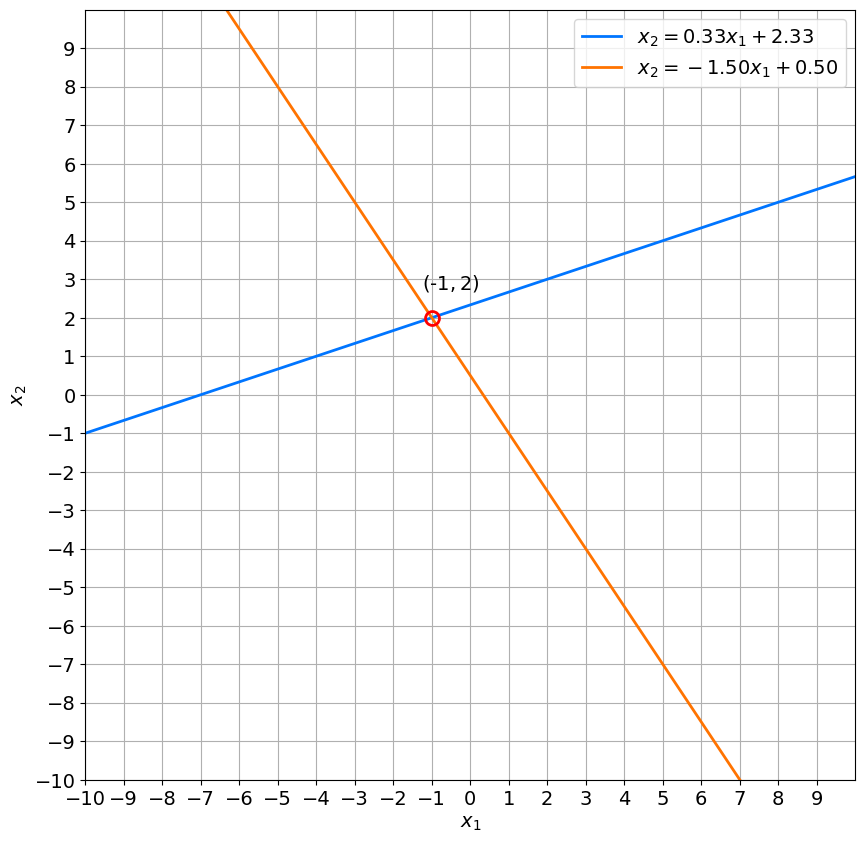

In [107]:
 plot_lines(System_A)